In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
import os
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
 
    
print("READY")

READY


In [3]:
def geo_location(address):
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


In [4]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=30
    CLIENT_ID = '2OLSXQ1LCKYFQPM2ET1PUG1H4J3KPIWTT122YABTAFXHYVDG'# your Foursquare ID
    CLIENT_SECRET ='53LI2GN0LDIW1ZAAJ3RATPQULRA1UGGHXIPYI0KWVWWPDR2G' # your Foursquare Secret
    VERSION = '20190327' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [5]:
def get_venue_details(venue_id):
        
    CLIENT_ID = '2OLSXQ1LCKYFQPM2ET1PUG1H4J3KPIWTT122YABTAFXHYVDG' # your Foursquare ID
    CLIENT_SECRET = '53LI2GN0LDIW1ZAAJ3RATPQULRA1UGGHXIPYI0KWVWWPDR2G' # your Foursquare Secret
    VERSION = '20190327' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [6]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [7]:
new_york_data=get_new_york_data()
manhattan_data=new_york_data[new_york_data.Borough == 'Manhattan']

I will only use data from Manhanttan

In [8]:
manhattan_data

,Borough,Neighborhood,Latitude,Longitude
6,Manhattan,Marble Hill,40.876551,-73.910660
100,Manhattan,Chinatown,40.715618,-73.994279
101,Manhattan,Washington Heights,40.851903,-73.936900
102,Manhattan,Inwood,40.867684,-73.921210
103,Manhattan,Hamilton Heights,40.823604,-73.949688
104,Manhattan,Manhattanville,40.816934,-73.957385
105,Manhattan,Central Harlem,40.815976,-73.943211
106,Manhattan,East Harlem,40.792249,-73.944182
107,Manhattan,Upper East Side,40.775639,-73.960508
108,Manhattan,Yorkville,40.775930,-73.947118


In [9]:
# prepare neighborhood list that contains chinese resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
chinese_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in manhattan_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    chinese_resturants=venues[venues['Category']=='Chinese Restaurant'] 
    print('(',count,'/',len(manhattan_data),')','Chinese Restaurant in '+Neighborhood+', '+Borough+':'+str(len(chinese_resturants)))
    for resturant_detail in chinese_resturants.values.tolist():
        id, name , category=resturant_detail
        chinese_rest_ny = chinese_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 40 ) Chinese Restaurant in Marble Hill, Manhattan:0
( 2 / 40 ) Chinese Restaurant in Chinatown, Manhattan:3
( 3 / 40 ) Chinese Restaurant in Washington Heights, Manhattan:0
( 4 / 40 ) Chinese Restaurant in Inwood, Manhattan:0
( 5 / 40 ) Chinese Restaurant in Hamilton Heights, Manhattan:0
( 6 / 40 ) Chinese Restaurant in Manhattanville, Manhattan:0
( 7 / 40 ) Chinese Restaurant in Central Harlem, Manhattan:1
( 8 / 40 ) Chinese Restaurant in East Harlem, Manhattan:0
( 9 / 40 ) Chinese Restaurant in Upper East Side, Manhattan:0
( 10 / 40 ) Chinese Restaurant in Yorkville, Manhattan:0
( 11 / 40 ) Chinese Restaurant in Lenox Hill, Manhattan:0
( 12 / 40 ) Chinese Restaurant in Roosevelt Island, Manhattan:0
( 13 / 40 ) Chinese Restaurant in Upper West Side, Manhattan:1
( 14 / 40 ) Chinese Restaurant in Lincoln Square, Manhattan:0
( 15 / 40 ) Chinese Restaurant in Clinton, Manhattan:0
( 16 / 40 ) Chinese Restaurant in Midtown, Manhattan:0
( 17 / 40 ) Chinese Restaurant in Murray Hill, Ma

In [11]:
chinese_rest_ny #data set of Chinese Restaurants in Manhanttan with their names and ID's

,Borough,Neighborhood,ID,Name
0,Manhattan,Chinatown,4db3374590a0843f295fb69b,Spicy Village
1,Manhattan,Chinatown,4a96bf8ff964a520ce2620e3,Wah Fung Number 1 Fast Food 華豐快飯店
2,Manhattan,Chinatown,5894c9a15e56b417cf79e553,Xi'an Famous Foods
3,Manhattan,Central Harlem,4bd1f6909854d13a38a2fa4d,88 Chinese Restaurant
4,Manhattan,Upper West Side,5529bfd8498ec6ce692d8015,Han Dynasty
5,Manhattan,Murray Hill,4e3484038877beb5e9a22a0b,Café China
6,Manhattan,Greenwich Village,5a20df1742d8c2528e74211f,Chow House
7,Manhattan,Lower East Side,5b380f649deb7d00399fdf9d,Kings County Imperial
8,Manhattan,Tribeca,5237264111d27e8e90c10357,China Blue
9,Manhattan,Manhattan Valley,529e3657498efb17e9c800b7,Xi'an Famous Foods


Now I will plot the results!


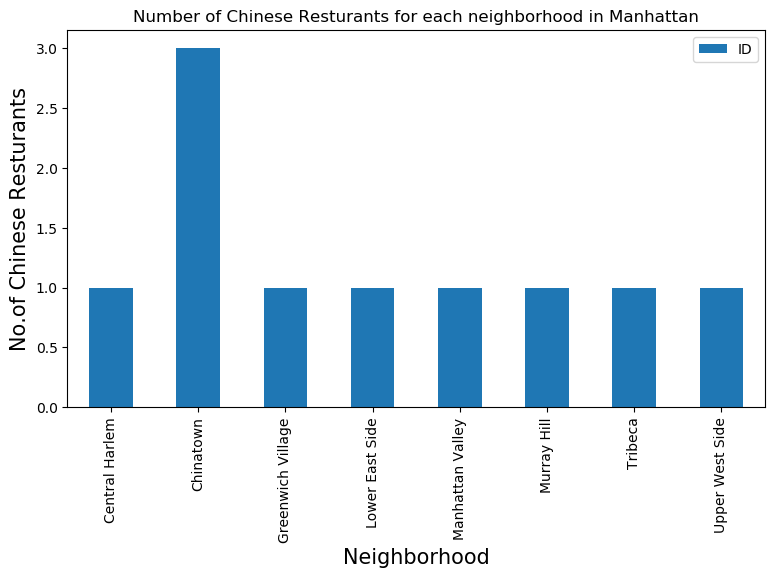

In [13]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Chinese Resturants for each neighborhood in Manhattan')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Chinese Resturants', fontsize=15)
#giving a bar plot
chinese_rest_ny.groupby('Neighborhood')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

Next, I will get the likes and tips of all the restaurants from Foursquare

In [15]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
chinese_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in chinese_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(chinese_rest_ny),')','processed')
    chinese_rest_stats_ny = chinese_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID           Name  Likes  Rating  Tips
0  4db3374590a0843f295fb69b  Spicy Village    500     8.7   179
( 1 / 10 ) processed
                         ID                               Name  Likes  Rating  \
0  4a96bf8ff964a520ce2620e3  Wah Fung Number 1 Fast Food 華豐快飯店    192     8.5   

   Tips  
0    95  
( 2 / 10 ) processed
                         ID                Name  Likes  Rating  Tips
0  5894c9a15e56b417cf79e553  Xi'an Famous Foods    104     8.8    29
( 3 / 10 ) processed
                         ID                   Name  Likes  Rating  Tips
0  4bd1f6909854d13a38a2fa4d  88 Chinese Restaurant      9     7.8     4
( 4 / 10 ) processed
                         ID         Name  Likes  Rating  Tips
0  5529bfd8498ec6ce692d8015  Han Dynasty    322     8.7    66
( 5 / 10 ) processed
                         ID        Name  Likes  Rating  Tips
0  4e3484038877beb5e9a22a0b  Café China   1046     8.6   273
( 6 / 10 ) processed
                         ID        

In [16]:
chinese_rest_stats_ny

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Manhattan,Chinatown,4db3374590a0843f295fb69b,Spicy Village,500,8.7,179
1,Manhattan,Chinatown,4a96bf8ff964a520ce2620e3,Wah Fung Number 1 Fast Food 華豐快飯店,192,8.5,95
2,Manhattan,Chinatown,5894c9a15e56b417cf79e553,Xi'an Famous Foods,104,8.8,29
3,Manhattan,Central Harlem,4bd1f6909854d13a38a2fa4d,88 Chinese Restaurant,9,7.8,4
4,Manhattan,Upper West Side,5529bfd8498ec6ce692d8015,Han Dynasty,322,8.7,66
5,Manhattan,Murray Hill,4e3484038877beb5e9a22a0b,Café China,1046,8.6,273
6,Manhattan,Greenwich Village,5a20df1742d8c2528e74211f,Chow House,69,8.9,6
7,Manhattan,Lower East Side,5b380f649deb7d00399fdf9d,Kings County Imperial,67,9.0,10
8,Manhattan,Tribeca,5237264111d27e8e90c10357,China Blue,352,8.6,86
9,Manhattan,Manhattan Valley,529e3657498efb17e9c800b7,Xi'an Famous Foods,295,8.4,80


In [17]:

chinese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
Borough         10 non-null object
Neighborhood    10 non-null object
ID              10 non-null object
Name            10 non-null object
Likes           10 non-null object
Rating          10 non-null float64
Tips            10 non-null object
dtypes: float64(1), object(6)
memory usage: 640.0+ bytes


In [18]:

chinese_rest_stats_ny['Likes']=chinese_rest_stats_ny['Likes'].astype('float64')
chinese_rest_stats_ny['Tips']=chinese_rest_stats_ny['Tips'].astype('float64')

Restauran with maximun likes:

In [19]:
chinese_rest_stats_ny.iloc[chinese_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                 Murray Hill
ID              4e3484038877beb5e9a22a0b
Name                          Café China
Likes                               1046
Rating                               8.6
Tips                                 273
Name: 5, dtype: object

In [20]:
chinese_rest_stats_ny.iloc[chinese_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood             Lower East Side
ID              5b380f649deb7d00399fdf9d
Name               Kings County Imperial
Likes                                 67
Rating                                 9
Tips                                  10
Name: 7, dtype: object

with maximun tips:




In [23]:
chinese_rest_stats_ny.iloc[chinese_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                 Murray Hill
ID              4e3484038877beb5e9a22a0b
Name                          Café China
Likes                               1046
Rating                               8.6
Tips                                 273
Name: 5, dtype: object

In [24]:

ny_neighborhood_stats=chinese_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [25]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False)

,Neighborhood,Average Rating
3,Lower East Side,9.000000
2,Greenwich Village,8.900000
7,Upper West Side,8.700000
1,Chinatown,8.666667
5,Murray Hill,8.600000
6,Tribeca,8.600000
4,Manhattan Valley,8.400000
0,Central Harlem,7.800000


Restaurants with a rating more than 9

In [26]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=9.0]

In [27]:

ny_neighborhood_stats

,Neighborhood,Average Rating
3,Lower East Side,9.0


In [28]:
ny_neighborhood_stats=pd.merge(manhattan_data, ny_neighborhood_stats,on='Neighborhood')

In [29]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [30]:
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Manhattan,Lower East Side,40.717807,-73.98089,9.0


Create map

In [31]:
ny_map = folium.Map(location=geo_location('New York City'), zoom_start=14)

In [32]:
incidents = folium.map.FeatureGroup()
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [33]:

ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [34]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)


As we can see, the area where Chinese Restaurants have the best likes and rating is Low East Side. There is only one restaurant with more than a 9 of rating. Kings County Imperial has a 9 of rating but only 67 likes and 10 tips. This makes this are the best to open a Chinese Restaurant becuase of the high rating for Chinese Food and low competition